<a href="https://colab.research.google.com/github/ameyaoka/ml-notebooks/blob/main/news_unmask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install datasets  transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from datasets import load_dataset

dataset = load_dataset("generative-newsai/news-unmasked")

  0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
print (dataset)

DatasetDict({
    train: Dataset({
        features: ['image', 'section', 'headline', 'image_id'],
        num_rows: 48988
    })
    test: Dataset({
        features: ['image', 'section', 'headline', 'image_id'],
        num_rows: 12247
    })
})


In [4]:
from transformers import ViltProcessor, ViltModel

from PIL import Image

import requests

### Building Dataset

In [7]:
image = "https://datasets-server.huggingface.co/assets/generative-newsai/news-unmasked/--/generative-newsai--news-unmasked/train/1/image/image.jpg"

In [8]:
train_data = dataset['train']

In [16]:
train_data

Dataset({
    features: ['image', 'section', 'headline', 'image_id'],
    num_rows: 48988
})

In [18]:
train_data['headline'][0]

"Role for Teachers Is Seen in Solving Schools ' Crises"

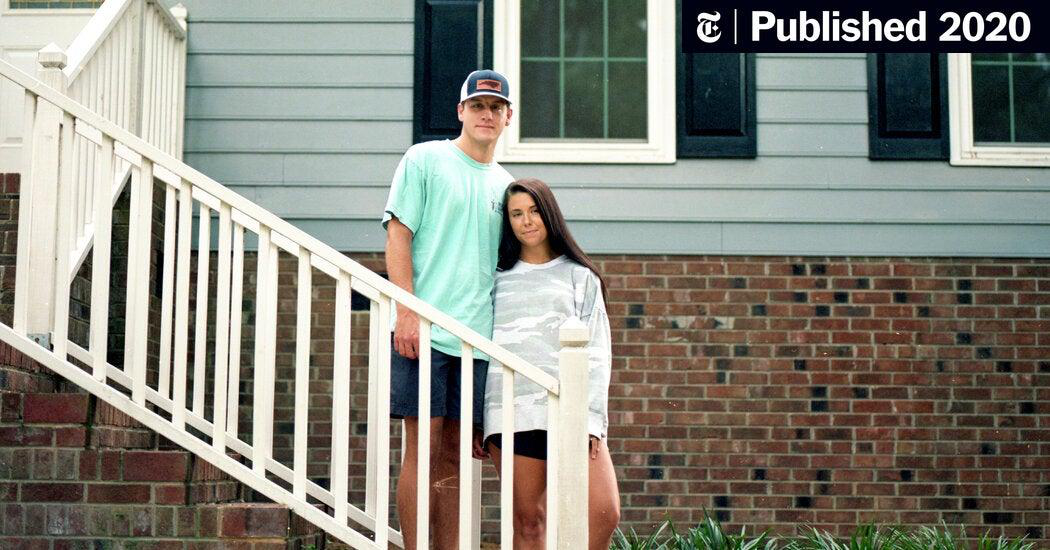

In [9]:

im = Image.open(requests.get(image, stream=True).raw)
im

In [10]:
text ='"Interest Rates Are Low , but Loans Are Harder to Get . Heres Why ."'

In [13]:
from transformers import ViltProcessor, ViltForMaskedLM , DataCollatorForLanguageModeling

processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-mlm")
model = ViltForMaskedLM.from_pretrained("dandelin/vilt-b32-mlm")
import torch

In [11]:
from transformers import BertTokenizerFast

In [ ]:
# data collator adds mask to text with mlm probability , this will serve as inputs .
data_collator = DataCollatorForLanguageModeling(tokenizer=BertTokenizerFast, mlm =True , mlm_probability=0.15)

In [14]:
input = processor(im , text , return_tensors='pt')

In [15]:
input

{'input_ids': tensor([[  101,  1000,  3037,  6165,  2024,  2659,  1010,  2021, 10940,  2024,
          6211,  2000,  2131,  1012,  2182,  2015,  2339,  1012,  1000,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), 'pixel_values': tensor([[[[ 0.7647,  0.7882,  0.7412,  ..., -1.0000, -1.0000, -1.0000],
          [ 0.7725,  0.7647,  0.7098,  ..., -1.0000, -1.0000, -1.0000],
          [ 0.7725,  0.7333,  0.6941,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-0.4353, -0.4118, -0.3804,  ..., -0.4196, -0.4431, -0.4824],
          [-0.2627, -0.4118, -0.4902,  ..., -0.4588, -0.5059, -0.5373],
          [-0.3490, -0.3569, -0.5294,  ..., -0.3020, -0.4039, -0.4588]],

         [[ 0.7647,  0.7725,  0.7176,  ..., -0.9843, -0.9843, -0.9843],
          [ 0.7647,  0.7490,  0.6941,  ..., -0.9843, -0.9843, -0.9843],
          [ 0.7569,  0.7176,  0.6784

In [ ]:
def tokenize_function(example)
    return tokenizer(example[image],example['text',truncation=True , padding= True])

In [15]:
tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

NameError: ignored